# **Importing necessary libraries and loading the dataset.**

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [66]:
df=pd.read_csv('Titanic-Dataset.csv')

# **Identifying missig values and handling them.**

<Axes: >

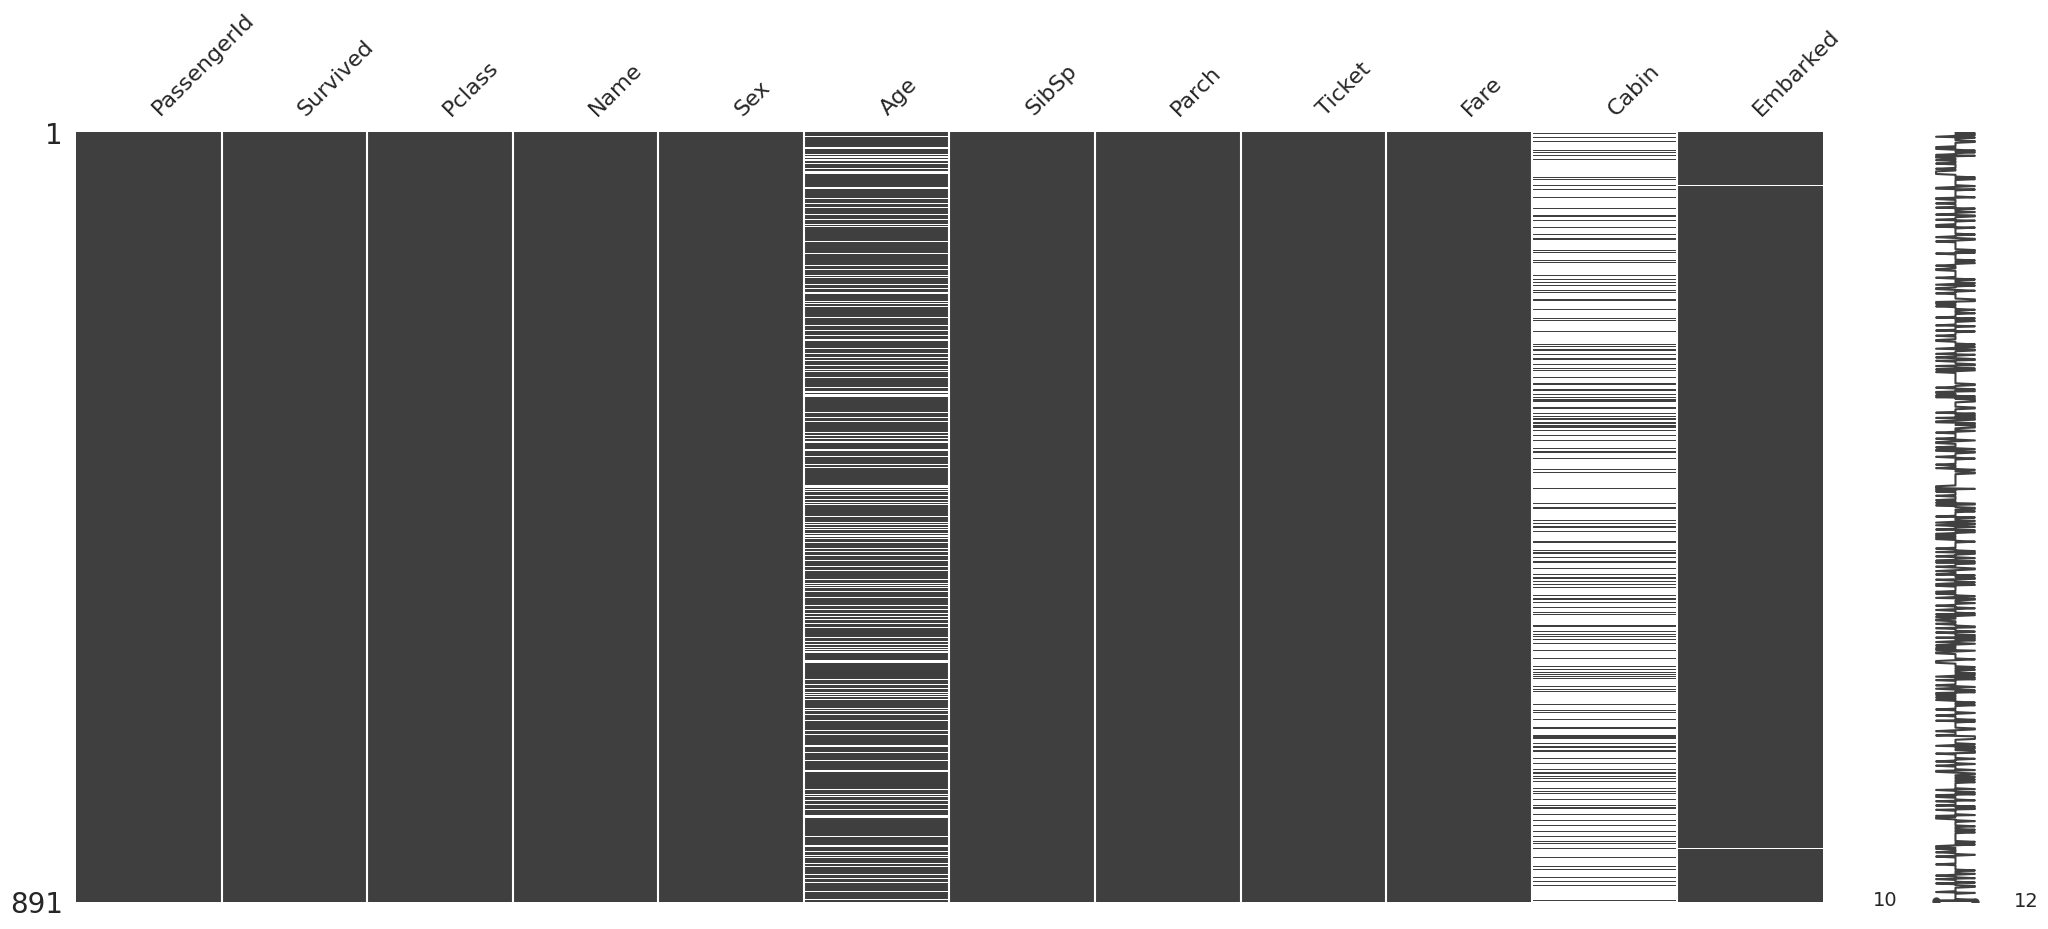

In [67]:
msno.matrix(df)

In [68]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.loc[df['Cabin'].isnull(), 'Cabin']='UNKNOWN'
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# **Calculating basic stats such as mean, median, mode, etc.**

In [69]:
print("Numeric Summary Statistics:")
print('\n')
print(df.describe())
print("\nCategorical Frequency Counts:")
for col in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    print(f"\n{col}:\n{df[col].value_counts()}")

Numeric Summary Statistics:


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Categorical Frequency Counts:

Survived:
Survived


# **Creating histogram and boxplot for numerical features.**

Text(0.5, 1.0, 'Boxplot of Age, Pclass and Survived')

<Figure size 1000x600 with 0 Axes>

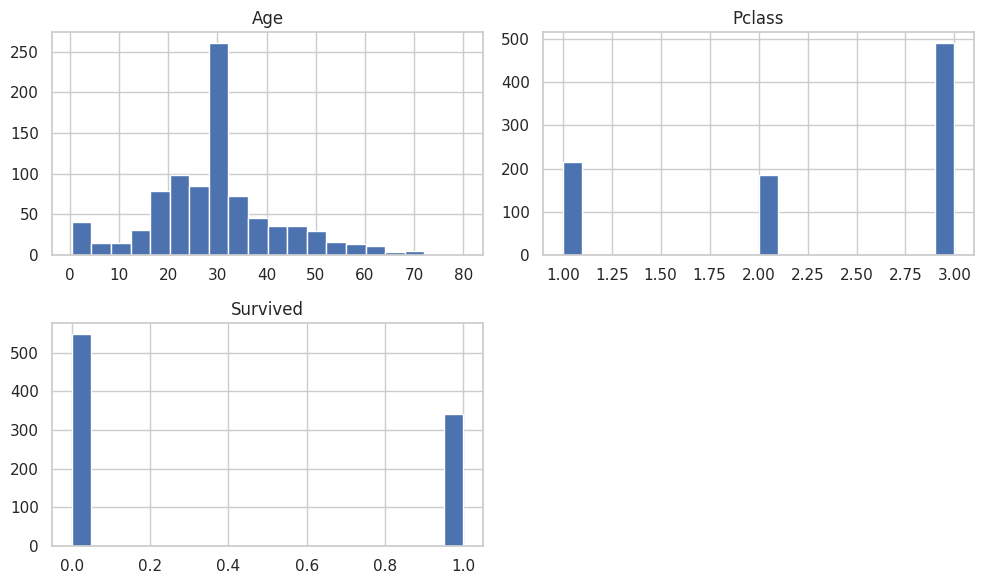

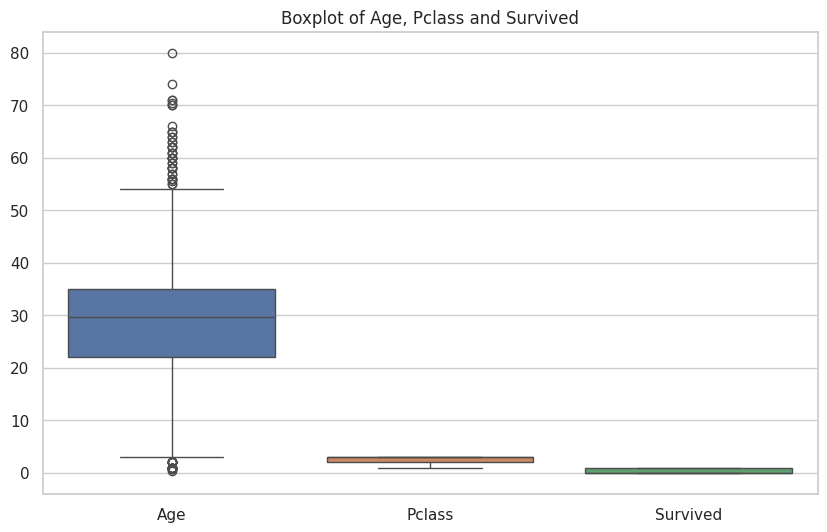

In [70]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
df[['Age', 'Pclass', 'Survived']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Pclass', 'Survived']])
plt.title('Boxplot of Age, Pclass and Survived')


# **Identifying correlation between the numeric features using correlation matrix and pairplots.**

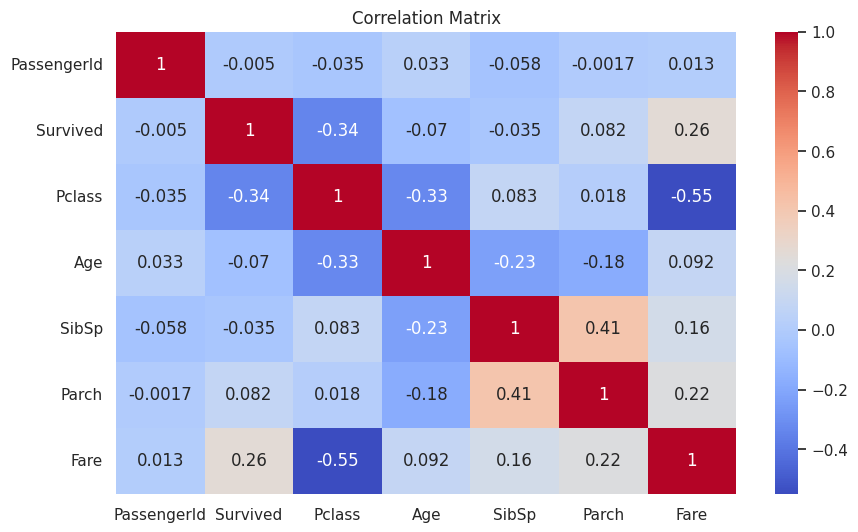

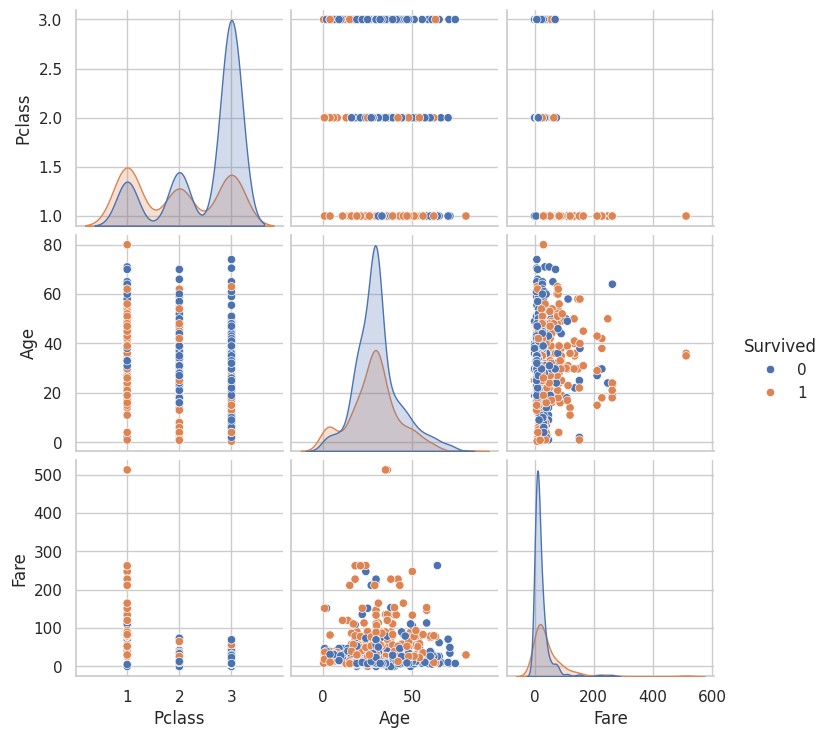

In [71]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')

# **Identifying patterns, anomalies and trends based on survival rate.**

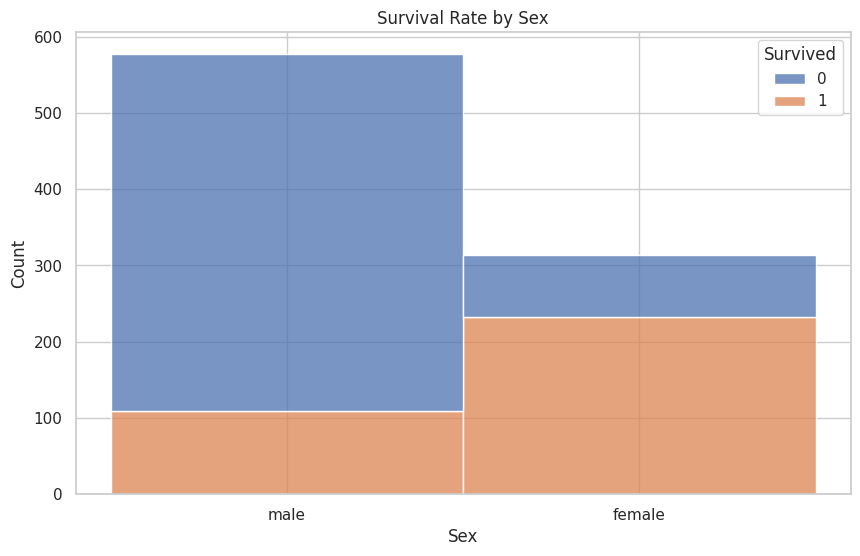

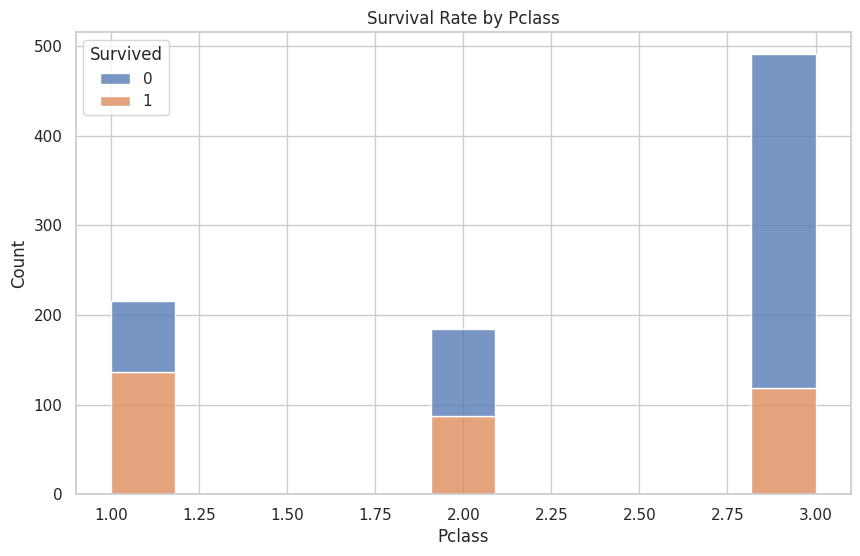

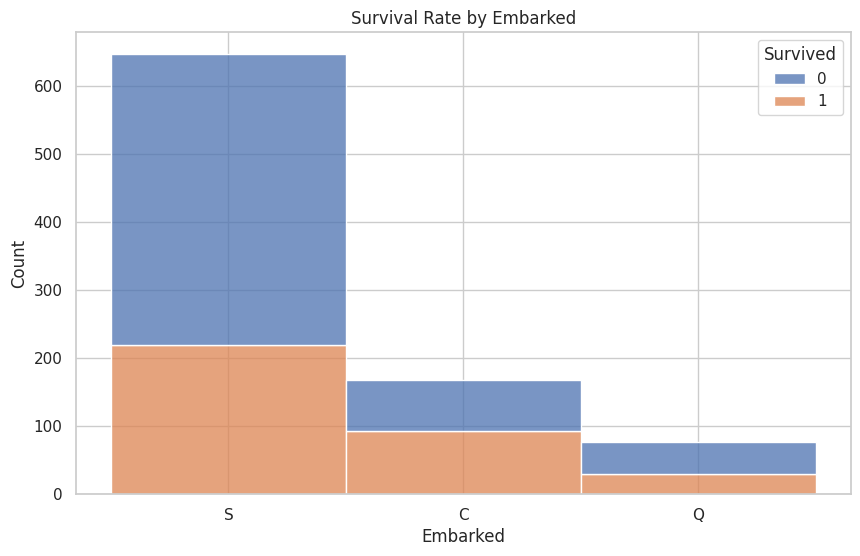

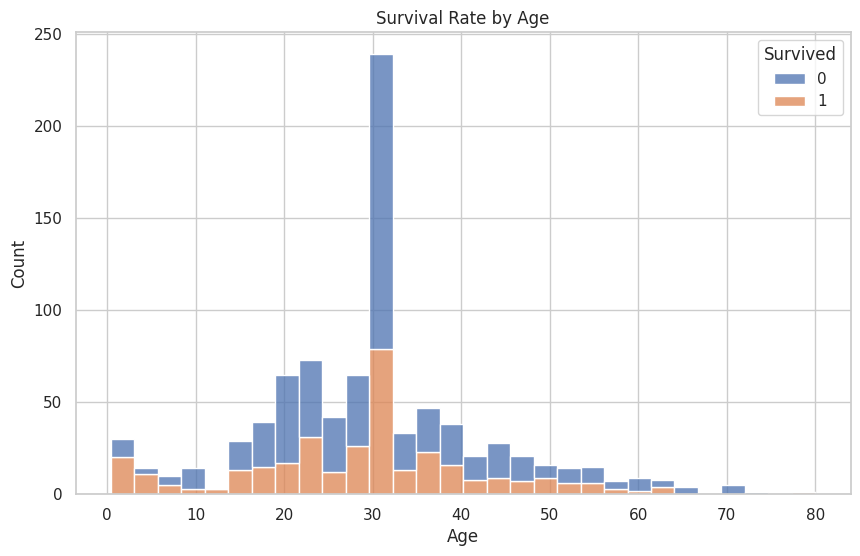

In [72]:
def plot_survival_rate(feature, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(x=feature, hue='Survived', data=df, multiple='stack')
    plt.title(title)
    plt.show()

plot_survival_rate('Sex', 'Survival Rate by Sex')
plot_survival_rate('Pclass', 'Survival Rate by Pclass')
plot_survival_rate('Embarked', 'Survival Rate by Embarked')
plot_survival_rate('Age', 'Survival Rate by Age')

# **Performing statistical test for identifying dependence and independence.**

### **Using Chi-Square test for categorical features vs survival.**
(Values less than 0.05 p-value indicate there's a significant relation between the feature and the survival rate)

In [73]:
def chi_square_test(feature):
    contingency_table = pd.crosstab(df[feature], df['Survived'])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    return p

print("\nChi-Square Test p-values (independence with Survived):")
print(f"Sex: {chi_square_test('Sex'):.2f}")
print(f"Pclass: {chi_square_test('Pclass'):.2f}")
print(f"Embarked: {chi_square_test('Embarked'):.2f}")
print(f"Age: {chi_square_test('Age'):.2f}")


Chi-Square Test p-values (independence with Survived):
Sex: 0.00
Pclass: 0.00
Embarked: 0.00
Age: 0.03


### **T-test for numerical features.**


In [76]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]
age_ttest = stats.ttest_ind(survived['Age'], not_survived['Age'], equal_var=False)
print(f"\nT-test for Age (Survived vs. Not Survived): p-value = {age_ttest.pvalue:.2f}")
pclass_ttest = stats.ttest_ind(survived['Pclass'], not_survived['Pclass'], equal_var=False)
print(f"T-test for Pclass (Survived vs. Not Survived): p-value = {pclass_ttest.pvalue:.2f}")



T-test for Age (Survived vs. Not Survived): p-value = 0.04
T-test for Pclass (Survived vs. Not Survived): p-value = 0.00
